In [1]:
import sys
sys.path.append("..")
import mlflow
import pandas as pd

def get_parameters_list(data):
    params  = data['params']
    return [params['model'], params['dataset']]


def get_metrics_list(data):
    if ('metrics' in data.keys()) and data['metrics']:
        metrics = data['metrics']
        return [metrics['accuracy'], metrics['f1_score']]
    else:
        return ['-', '-']

In [2]:
# List all existing experiments
all_experiments = mlflow.list_experiments()
exp_data = []
for exp in all_experiments:
    row = [exp.name, exp.artifact_location, exp.lifecycle_stage]
    exp_data.append(row)
exp_frame = pd.DataFrame(exp_data, columns = ['Name', 'Artifacts', 'Status'])
print(exp_frame)

      Name                                          Artifacts  Status
0  Default  file:///mnt/nfs/home/koshkinam/vector-delirium...  active


In [3]:
# For model training experiment - display last 100 runs with a subset of parameters and metrics
exp = mlflow.get_experiment_by_name('Default')
runs = mlflow.list_run_infos(exp.experiment_id, max_results=100)
data = []
for r in runs:
    run_data = mlflow.get_run(r.run_id).to_dictionary()['data']
    row = get_parameters_list(run_data) + get_metrics_list(run_data)
    data.append(row)
frame = pd.DataFrame(data, columns=['Model', 'Dataset', 'Accuracy', 'F1 Score'])
print('------------------- Model Training Runs ----------------------')
print(frame)

------------------- Model Training Runs ----------------------
  Model Dataset  Accuracy  F1 Score
0   mlp  gemini  0.677302  0.364904
1   mlp    None         -         -


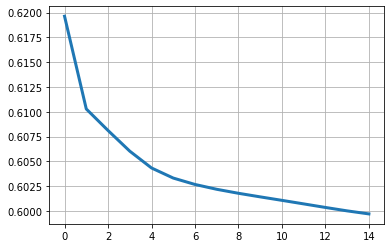

In [6]:
# Show training metrics for the latest model
from mlflow.tracking import MlflowClient
import matplotlib.pyplot as plt
import numpy as np

client = MlflowClient()

# Show training metrics for the latest model
runs = mlflow.list_run_infos(exp.experiment_id, max_results=100)
current = runs[0]
losses = client.get_metric_history(current.run_id, 'epoch_loss')
y = [l.value for l in losses]

fig = plt.figure()
ax = plt.axes()
x = list(range(len(losses)))

plt.plot(x, y, '-', linewidth=3)

#ax.set_xticks(x)

plt.grid()
plt.show()